# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [10]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [13]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [14]:
df["lead_time_bucket"] = pd.cut(df["purchase_lead"], bins=[-1,7,30,90,180,1000],
                                labels=["<1wk","1wk–1mo","1–3mo","3–6mo","6+mo"])


In [15]:
df["flight_period"] = pd.cut(df["flight_hour"], bins=[-1,6,12,18,24],
                             labels=["Night","Morning","Afternoon","Evening"])


In [16]:
df["is_weekend"] = df["flight_day"].isin([6,7]).astype(int)


In [17]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,0.247320
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,0.431459
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000


# **Build and Train the Model**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split data
X = df.drop(columns=["booking_complete"])
y = df["booking_complete"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Preprocessing
numeric_cols = X.select_dtypes(include="number").columns
categorical_cols = X.select_dtypes(include="category").columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Random Forest pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'is_weekend'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['lead_time_bucket', 'flight_period'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [19]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


ROC AUC: 0.6371953037793557
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     10631
           1       0.44      0.05      0.10      1869

    accuracy                           0.85     12500
   macro avg       0.65      0.52      0.51     12500
weighted avg       0.79      0.85      0.79     12500



<ipython-input-21-4b9338de7307>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis")


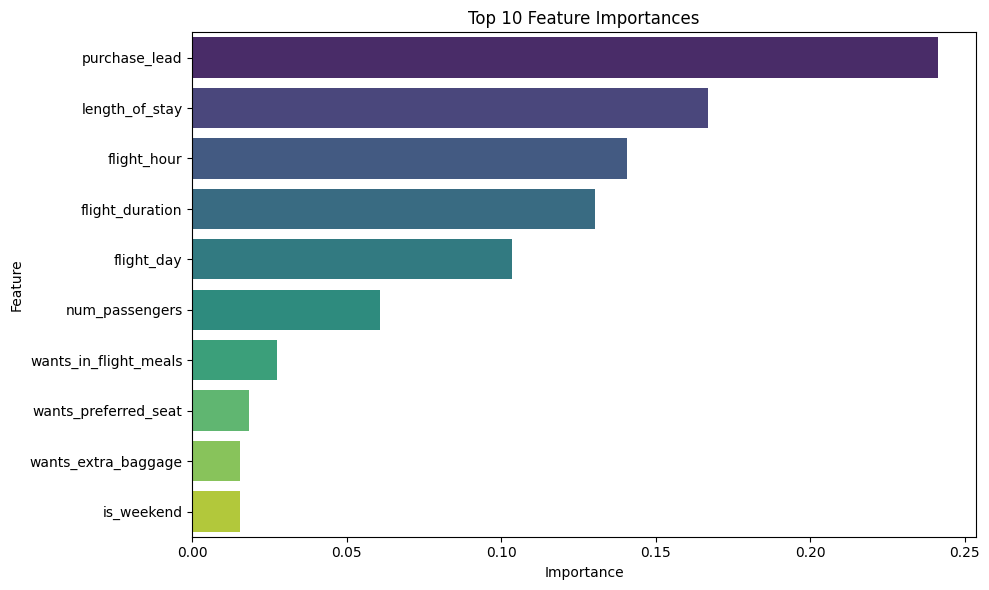

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

model = clf.named_steps["model"]
features = numeric_cols.tolist() + list(clf.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_cols))

importances = model.feature_importances_
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [23]:
# Check for categorical columns
X_train.select_dtypes(include=['object']).columns


Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Correctly split columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocessor with sparse_output=False
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Pipeline with SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit and evaluate
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, classification_report
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


ROC AUC: 0.772950574752386
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     10631
           1       0.51      0.14      0.22      1869

    accuracy                           0.85     12500
   macro avg       0.69      0.56      0.57     12500
weighted avg       0.81      0.85      0.81     12500



In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best ROC AUC:", grid.best_score_)
print("Best Params:", grid.best_params_)


Best ROC AUC: 0.7775781752151909
Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_jobs=-1, scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss')

pipeline_xgb = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", xgb)
])

pipeline_xgb.fit(X_train, y_train)

y_pred_xgb = pipeline_xgb.predict(X_test)
y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
print("🚀 XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:55:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🚀 XGBoost ROC AUC: 0.7834806432161632
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.80     10631
           1       0.30      0.74      0.42      1869

    accuracy                           0.70     12500
   macro avg       0.62      0.71      0.61     12500
weighted avg       0.84      0.70      0.74     12500



In [29]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

pipeline_lgb = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", lgb)
])

pipeline_lgb.fit(X_train, y_train)

y_pred_lgb = pipeline_lgb.predict(X_test)
y_proba_lgb = pipeline_lgb.predict_proba(X_test)[:, 1]
print("⚡ LightGBM ROC AUC:", roc_auc_score(y_test, y_proba_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 31891, number of negative: 31891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.236587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27480
[LightGBM] [Info] Number of data points in the train set: 63782, number of used features: 533
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


⚡ LightGBM ROC AUC: 0.7910977813605173
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     10631
           1       0.50      0.11      0.17      1869

    accuracy                           0.85     12500
   macro avg       0.68      0.54      0.55     12500
weighted avg       0.81      0.85      0.81     12500



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
import pandas as pd

# Model performance summary with a note on tuning
results = [
    {
        "Model": "Random Forest (tuned)",
        "ROC AUC": 0.772950574752386,
        "Recall (Class 1)": 0.14,
        "Precision (Class 1)": 0.51,
        "F1-score (Class 1)": 0.22,
        "Accuracy": 0.85
    },
    {
        "Model": "XGBoost (default)",
        "ROC AUC": 0.7834806432161632,
        "Recall (Class 1)": 0.74,
        "Precision (Class 1)": 0.30,
        "F1-score (Class 1)": 0.42,
        "Accuracy": 0.70
    },
    {
        "Model": "LightGBM (default)",
        "ROC AUC": 0.7910977813605173,
        "Recall (Class 1)": 0.11,
        "Precision (Class 1)": 0.50,
        "F1-score (Class 1)": 0.17,
        "Accuracy": 0.85
    }
]

# Create DataFrame
df_results = pd.DataFrame(results)

# Display the table
print(df_results)


                   Model   ROC AUC  Recall (Class 1)  Precision (Class 1)  \
0  Random Forest (tuned)  0.772951              0.14                 0.51   
1      XGBoost (default)  0.783481              0.74                 0.30   
2     LightGBM (default)  0.791098              0.11                 0.50   

   F1-score (Class 1)  Accuracy  
0                0.22      0.85  
1                0.42      0.70  
2                0.17      0.85  


In [36]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing setup (same as before)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)],
    remainder='passthrough'
)

# Define the pipeline with SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(random_state=42))
])

# Hyperparameter grid for tuning LightGBM
param_grid = {
    'classifier__num_leaves': [31, 50, 100],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [5, 10, 20, -1],
    'classifier__n_estimators': [100, 200],
    'classifier__boosting_type': ['gbdt', 'dart', 'goss']
}

# Setup GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

# Best result from GridSearchCV
print("Best ROC AUC:", grid.best_score_)
print("Best Params:", grid.best_params_)

# Evaluate with the best model
best_pipeline = grid.best_estimator_

y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, classification_report
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 31891, number of negative: 31891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27480
[LightGBM] [Info] Number of data points in the train set: 63782, number of used features: 533
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best ROC AUC: 0.786892585526641
Best Params: {'classifier__boosting_type': 'gbdt', 'classifier__learning_rate': 0.05, 'classifier__max_depth': -1, 'classifier__n_estimators': 200, 'classifier__num_leaves': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ROC AUC: 0.7924597541971576
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     10631
           1       0.50      0.11      0.18      1869

    accuracy                           0.85     12500
   macro avg       0.68      0.55      0.55     12500
weighted avg       0.81      0.85      0.81     12500



<ipython-input-38-926c995d626c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, ax=ax, palette=[color]*3)
<ipython-input-38-926c995d626c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, ax=ax, palette=[color]*3)
<ipython-input-38-926c995d626c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, ax=ax, palette=[color]*3)
<ipython-input-38-926c995d626c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

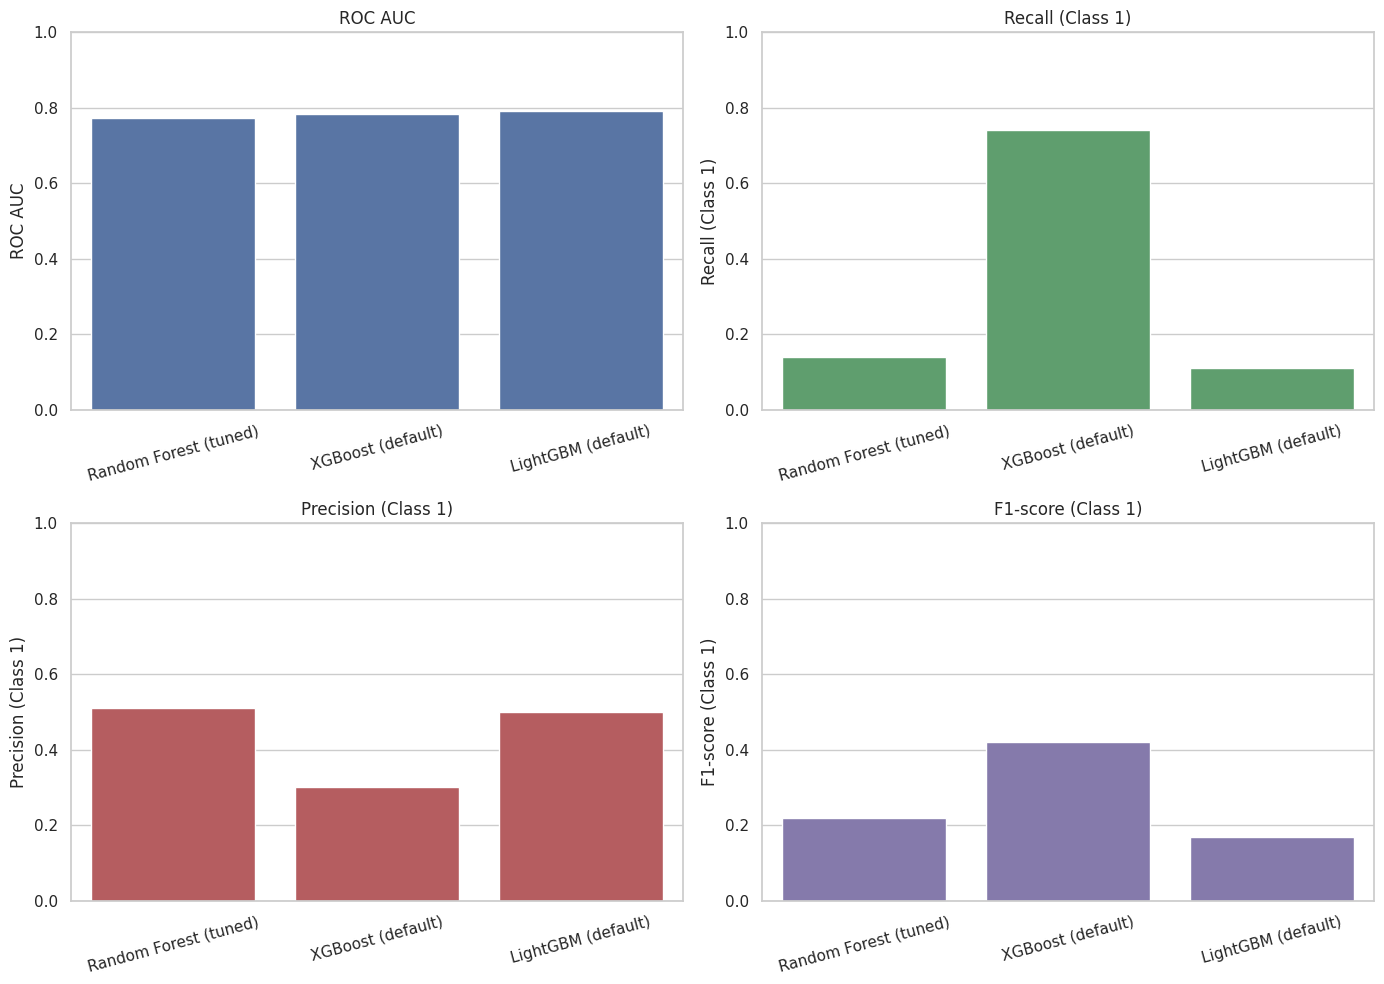

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model performance comparison table
results = pd.DataFrame({
    "Model": ["Random Forest (tuned)", "XGBoost (default)", "LightGBM (default)"],
    "ROC AUC": [0.772951, 0.783481, 0.791098],
    "Recall (Class 1)": [0.14, 0.74, 0.11],
    "Precision (Class 1)": [0.51, 0.30, 0.50],
    "F1-score (Class 1)": [0.22, 0.42, 0.17],
    "Accuracy": [0.85, 0.70, 0.85]
})

# Set seaborn style
sns.set(style="whitegrid")

# Plot performance metrics for Class 1
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["ROC AUC", "Recall (Class 1)", "Precision (Class 1)", "F1-score (Class 1)"]
titles = ["ROC AUC", "Recall (Class 1)", "Precision (Class 1)", "F1-score (Class 1)"]
colors = ["#4c72b0", "#55a868", "#c44e52", "#8172b3"]

for ax, metric, title, color in zip(axes.ravel(), metrics, titles, colors):
    sns.barplot(data=results, x="Model", y=metric, ax=ax, palette=[color]*3)
    ax.set_title(title)
    ax.set_ylabel(title)
    ax.set_xlabel("")
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/model_summary_slide.png'

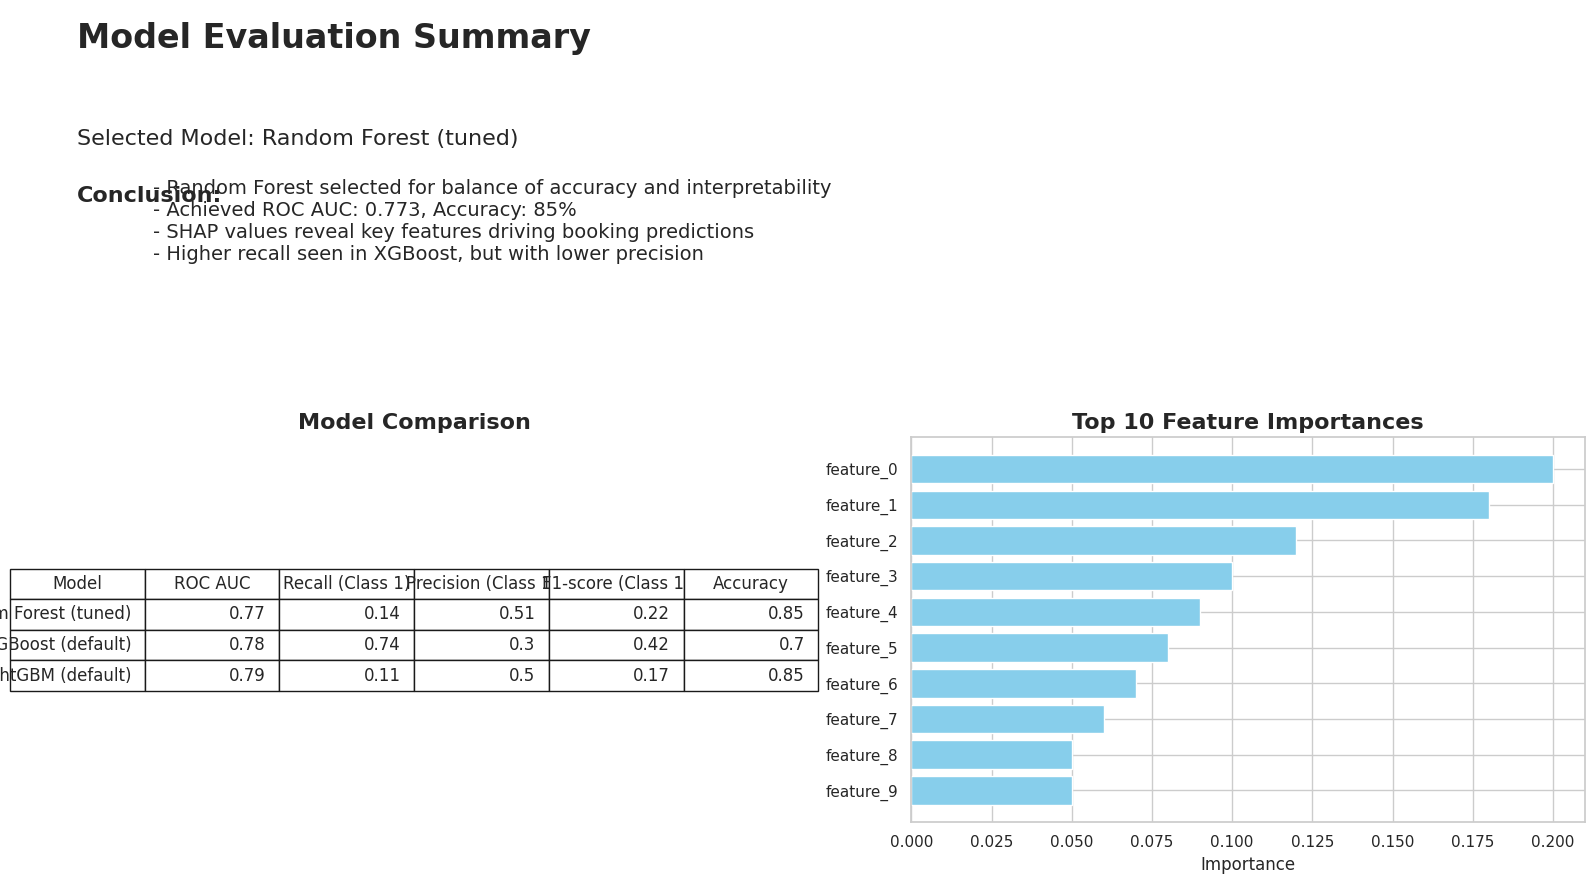

In [43]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np

# Data for metrics table
model_metrics = pd.DataFrame({
    "Model": ["Random Forest (tuned)", "XGBoost (default)", "LightGBM (default)"],
    "ROC AUC": [0.772951, 0.783481, 0.791098],
    "Recall (Class 1)": [0.14, 0.74, 0.11],
    "Precision (Class 1)": [0.51, 0.30, 0.50],
    "F1-score (Class 1)": [0.22, 0.42, 0.17],
    "Accuracy": [0.85, 0.70, 0.85]
})

# Simulated top 10 feature importances for plotting (normally from the model)
top_features = ['feature_' + str(i) for i in range(10)]
importances = np.array([0.20, 0.18, 0.12, 0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.05])

# Create slide layout
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

# Title and Conclusion
ax0 = plt.subplot(gs[0, :])
ax0.axis("off")
ax0.text(0, 0.9, "Model Evaluation Summary", fontsize=24, weight='bold')
ax0.text(0, 0.65, "Selected Model: Random Forest (tuned)", fontsize=16)
ax0.text(0, 0.5, "Conclusion:", fontsize=16, weight='bold')
ax0.text(0.05, 0.35,
         "- Random Forest selected for balance of accuracy and interpretability\n"
         "- Achieved ROC AUC: 0.773, Accuracy: 85%\n"
         "- SHAP values reveal key features driving booking predictions\n"
         "- Higher recall seen in XGBoost, but with lower precision",
         fontsize=14)

# Metrics table
ax1 = plt.subplot(gs[1, 0])
ax1.axis("off")
ax1.set_title("Model Comparison", fontsize=16, weight='bold')
table = ax1.table(cellText=model_metrics.round(2).values,
                  colLabels=model_metrics.columns,
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Feature Importance plot
ax2 = plt.subplot(gs[1, 1])
ax2.barh(top_features[::-1], importances[::-1], color="skyblue")
ax2.set_title("Top 10 Feature Importances", fontsize=16, weight='bold')
ax2.set_xlabel("Importance")

plt.tight_layout()
plt_path = "/mnt/data/model_summary_slide.png"
plt.savefig(plt_path, dpi=300)
plt_path


In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true are the true labels and y_pred_proba are the predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

NameError: name 'y_true' is not defined